In [150]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

# sklearn models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [80]:
path = os.getcwd() + '\\Structured_data.csv'
data = pd.read_csv(path, header=0)
data.head()

# Create dataframe using relevant colums
# x = data[["Datetime","Open_BTC","High_BTC","Low_BTC","Close_BTC","Volume_BTC","Dividends_BTC","Stock Splits_BTC",
#           "Open_diff_BTC","High_diff_BTC","Close_diff_BTC","Volume_diff_BTC","Open_VET","High_VET","Low_VET","Close_VET",
#           "Volume_VET","Dividends_VET","Stock Splits_VET","Open_diff_VET","High_diff_VET","Close_diff_VET","Volume_diff_VET"]]

# Create targets using next timestep
# y_VET = []
# for i in range(0, len(data.index) - 1):
#     y_VET.append(x.iloc[i + 1]["Close_VET"])

# Assign it to np array
# y_VET = np.array([y_VET])

# Remove last row since we can't have target for last row
# x = x[:-1]

df = data.iloc[:, :-2]
df.head()

y_Reg_VET = data.iloc[:, -2:-1].values.ravel()
y_Reg_VET.shape

y_Class_VET = data.iloc[:, -1:].values.ravel()
y_Class_VET.shape

(1144,)

In [99]:
# Transforms datetime into incremental values
# le = LabelEncoder()
# x["Datetime"] = le.fit_transform(x["Datetime"])

# Consider removing datetime from data
# x.drop(["Datetime"], inplace=True, axis=1)

print(y_Class_VET)
df.head()


[1. 0. 1. ... 0. 1. 0.]


,Target-20_Open_VET,Target-20_High_VET,Target-20_Low_VET,Target-20_Close_VET,Target-20_Volume_VET,Target-20_Open_BTC,Target-20_High_BTC,Target-20_Low_BTC,Target-20_Close_BTC,Target-20_Volume_BTC,...,Target-1_Close_VET,Target-1_Volume_VET,Target-1_Open_BTC,Target-1_High_BTC,Target-1_Low_BTC,Target-1_Close_BTC,Target-1_Volume_BTC,Target-1_SMA20,Target-1_Upper_Bollinger_Band,Target-1_Lower_Bollinger_Band
0,0.014743,0.014743,0.013981,0.014535,19980000,6551.520020,6719.959961,6498.640137,6719.959961,4097820000,...,0.013835,25123900,6317.009766,6363.870117,6265.089844,6351.799805,4064230000,0.016273,0.019782,0.012764
1,0.014552,0.015735,0.014244,0.015413,24453700,6719.950195,6789.629883,6700.959961,6763.189941,3312600000,...,0.014060,28222000,6354.240234,6535.410156,6354.240234,6517.310059,4210910000,0.016249,0.019811,0.012688
2,0.015390,0.015446,0.014513,0.015233,20503900,6754.640137,6774.750000,6620.750000,6707.259766,3295500000,...,0.013978,16430800,6515.410156,6596.100098,6456.169922,6512.709961,4076220000,0.016178,0.019857,0.012499
3,0.015222,0.017856,0.015210,0.017824,53968100,6710.799805,6884.640137,6689.709961,6884.640137,4019000000,...,0.014275,14368600,6509.399902,6561.720215,6493.549805,6543.200195,3216300000,0.016130,0.019879,0.012380
4,0.017839,0.018756,0.017549,0.017980,45607800,6891.080078,7109.560059,6882.339844,7096.279785,4659940000,...,0.014170,10220600,6536.680176,6544.330078,6460.100098,6517.180176,3273730000,0.015947,0.019699,0.012196


In [90]:
X_train, X_test, y_train, y_test = train_test_split(df, y_Class_VET, test_size=0.20, random_state=0, shuffle=False)

## Logistic Regression

In [93]:
# Logistic Regression 
lg = LogisticRegression(random_state=0, max_iter=1000000)

# Fit with training data
lg.fit(X_train,y_train)
predicted = lg.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.47      0.46      0.46       102
         1.0       0.57      0.57      0.57       127

    accuracy                           0.52       229
   macro avg       0.52      0.52      0.52       229
weighted avg       0.52      0.52      0.52       229



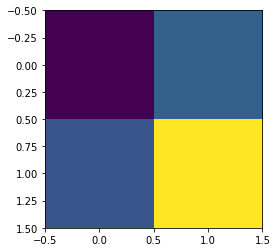

In [94]:
# Confusion matrix to check predicted
conf_matrix = confusion_matrix(y_test, predicted)
conf_matrix = np.array(conf_matrix)
conf_matrix = pd.DataFrame(data=conf_matrix)

plt.imshow(conf_matrix)

print(classification_report(y_test, predicted))

Text(0, 0.5, 'Precision')

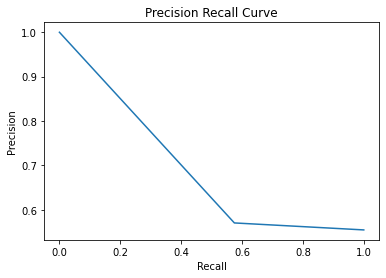

In [95]:
# Precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, predicted)
plt.plot(recall, precision)
plt.title("Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

## Polynomial Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y_Reg_VET, test_size=0.20, random_state=0, shuffle=False)

In [154]:
# WIP Polynomial Regression as another way to model our data
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df)
X_test_poly = poly.fit_transform(X_test)

lg = LinearRegression()

# Fit
lg.fit(X_poly, y_Reg_VET)

# Obtain coefficients
# print(lg.coef_)

# Predict
predictions_poly = lg.predict(X_test_poly)
# print(predictions_poly)

lg.score(X_poly, y_Reg_VET)

# RMSE Root-mean-square deviation
print(np.sqrt(mean_squared_error(y_test, predictions_poly)))

# Plotting the Least Squares Line
sns.pairplot(data, x_vars=df.colums, y_vars='y_Reg_VET', size=7, aspect=0.7, kind='reg')

5.487424509530664e-09


AttributeError: 'LinearRegression' object has no attribute 'summary'

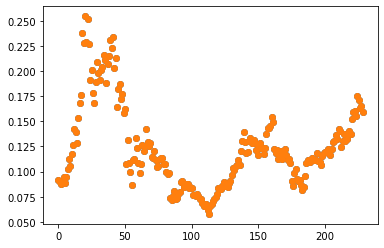

In [147]:
# print(y_Reg_VET[:229])

# print(y_Reg_VET[:229].shape)
# print(predictions_poly.shape)
# plt.scatter(y_Reg_VET[:229], predictions_poly)

plt.scatter(np.arange(229), predictions_poly)

plt.scatter(np.arange(229), y_Reg_VET[-229:])


# residuals = np.subtract(predictions_poly, y_Reg_VET[-229:])

# perc = np.zeros(len(residuals))
# for i in range(0, len(residuals)):
#     print(residuals[i])
#     print(y_Reg_VET[-(229 - i)])
#     perc[i] = (residuals[i] / y_Reg_VET[-(229 - i)]) * 100

# print(perc)
    
# print(y_Reg_VET[-229:].shape)


# plt.scatter(X_test["Close_VET"], predictions_poly)